# Project

## Netflix Data Analysis

### import necessary libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

### Movies vs TV Shows Distribution

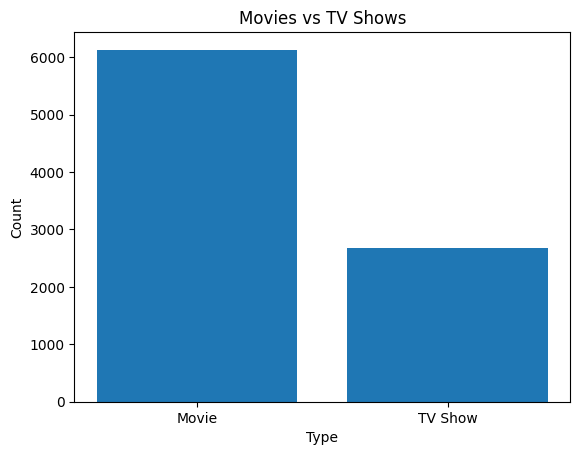

In [15]:
df = pd.read_csv("netflix_titles.csv")

type_count = df['type'].value_counts()

plt.figure()
plt.bar(type_count.index, type_count.values)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Movies vs TV Shows")
plt.show()

### Content Added Over Years

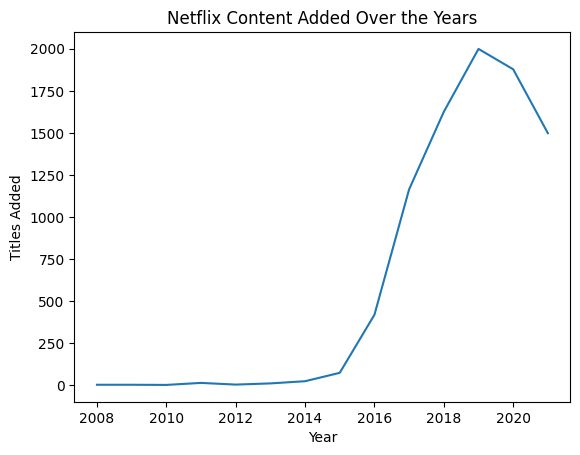

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

year_count = df['year_added'].value_counts().sort_index()

plt.figure()
plt.plot(year_count.index, year_count.values)
plt.xlabel("Year")
plt.ylabel("Titles Added")
plt.title("Netflix Content Added Over the Years")
plt.show()


### Movies vs TV Shows Growth Trend

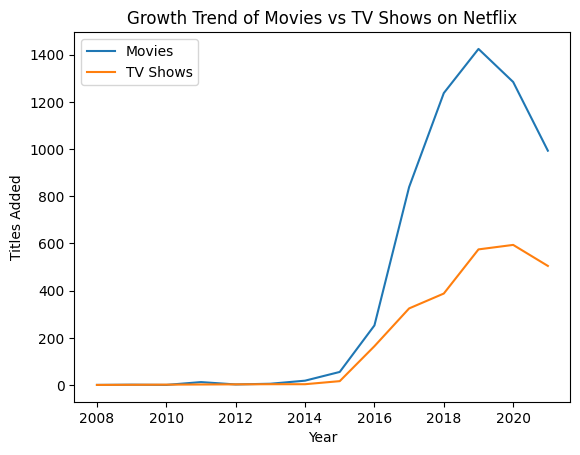

In [17]:
movie_data = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
tv_data = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.figure()
plt.plot(movie_data.index, movie_data.values, label="Movies")
plt.plot(tv_data.index, tv_data.values, label="TV Shows")
plt.xlabel("Year")
plt.ylabel("Titles Added")
plt.title("Growth Trend of Movies vs TV Shows on Netflix")
plt.legend()
plt.show()


### Top 10 Genres on Netflix

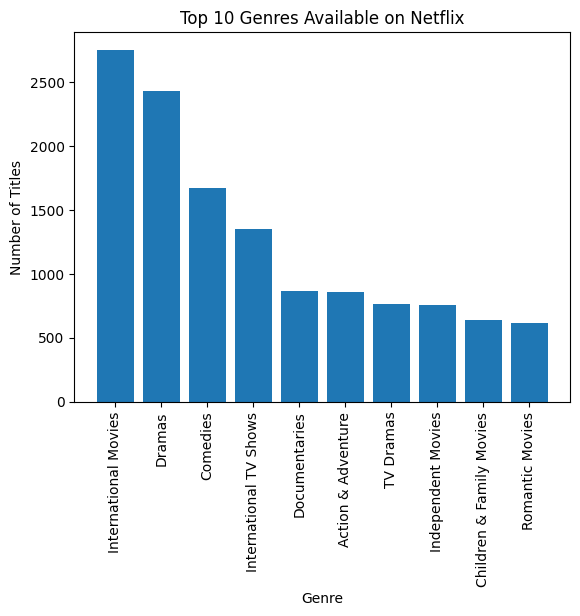

In [18]:
genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure()
plt.bar(top_genres.index, top_genres.values)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.title("Top 10 Genres Available on Netflix")
plt.show()


### Top Content Producing Countries

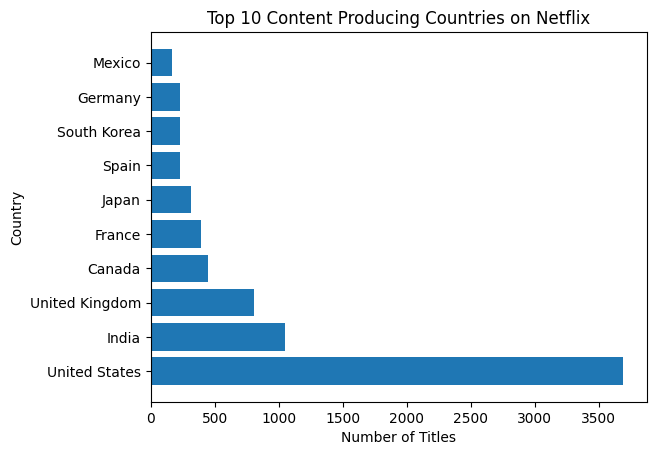

In [19]:
countries = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = countries.value_counts().head(10)

plt.figure()
plt.barh(top_countries.index, top_countries.values)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Content Producing Countries on Netflix")
plt.show()


### Movies vs TV Shows by Top Countries

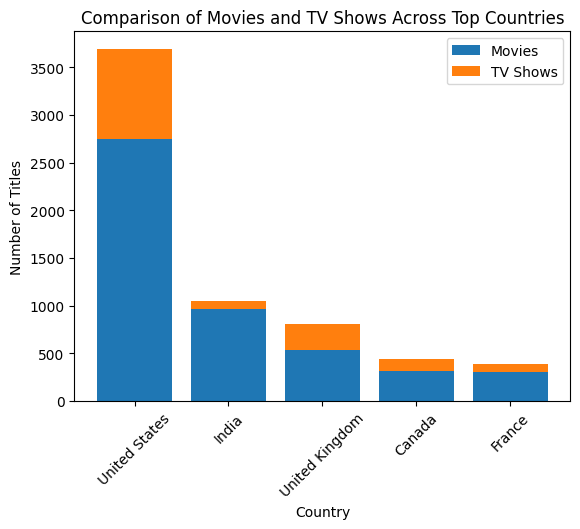

In [21]:
df_country = df.loc[countries.index].copy()
df_country['country_clean'] = countries.values

top5 = df_country['country_clean'].value_counts().head(5).index

movie_counts = []
tv_counts = []

for c in top5:
    movie_counts.append(len(df_country[(df_country['country_clean'] == c) & (df_country['type'] == 'Movie')]))
    tv_counts.append(len(df_country[(df_country['country_clean'] == c) & (df_country['type'] == 'TV Show')]))

x = range(len(top5))

plt.figure()
plt.bar(x, movie_counts, label="Movies")
plt.bar(x, tv_counts, bottom=movie_counts, label="TV Shows")
plt.xticks(x, top5, rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Comparison of Movies and TV Shows Across Top Countries")
plt.legend()
plt.show()
